# Filtro ideal (elipse raios U,V)

Demonstração de filtragem ideal passa baixas de frequências de corte: (U,V)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_6/')
if path not in sys.path:
    sys.path.append(path)
import ptrans as ptr

In [2]:
def filtroidealdemo(f,U,V):
    '''
    Inputs:
    f - input image
    U - vertical radius
    V - horizontal radius
    
    Output:
    fh - filtered image
    '''
    F = np.fft.fft2(f)
    H,W = F.shape
    Fh = np.zeros_like(F)
    
    r,c = np.indices((H,W))
    Fh[( ((r-H//2)/U)**2 + ((c-W//2)/V)**2)<1]=1
    Fh = ptr.ptransfat(Fh,(H//2,W//2))
    fh = np.fft.ifft2(F * Fh)
    
    plt.figure(1,figsize=(12,12))
    plt.subplot(221)
    plt.imshow(f,cmap='gray')
    plt.title("f - imagem original")
    plt.subplot(222)
    plt.imshow(ptr.ptransfat(np.log(1+ np.abs(F)),(H//2,W//2)),cmap='gray')
    plt.title("F - espectro da imagem")
    plt.subplot(223)
    plt.imshow(ptr.ptransfat(np.log(1+ np.abs(F*Fh)),(H//2,W//2)),cmap='gray')
    plt.title("F*Fh - espectro filtrado")
    plt.subplot(224)
    plt.imshow(fh.real,cmap='gray')
    plt.title("fh - imagem filtrada")
    
    return fh
    

In [3]:
testing = (__name__ == '__main__')

if testing:
    import sys,os
    ! jupyter nbconvert --to 'python' filtroidealdemo

    path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_8/')
    if path not in sys.path:
        sys.path.append(path)
    import filtroidealdemo as fid

[NbConvertApp] Converting notebook filtroidealdemo.ipynb to python
[NbConvertApp] Writing 3117 bytes to filtroidealdemo.py


f:
 [[   0.   10.   20.   25.    0.    0.]
 [  50.   60.   70.   75.   50.   50.]
 [ 100.  110.  120.  125.  100.  100.]
 [ 200.  210.  220.  225.  200.  200.]
 [   0.   10.   20.   25.    0.    0.]
 [   0.   10.   20.   25.    0.    0.]]
g:
 [[ 68.  68.  68.  68.  68.  68.]
 [ 68.  68.  68.  68.  68.  68.]
 [ 68.  68.  68.  68.  68.  68.]
 [ 68.  68.  68.  68.  68.  68.]
 [ 68.  68.  68.  68.  68.  68.]
 [ 68.  68.  68.  68.  68.  68.]]
média da imagem:
 68.0


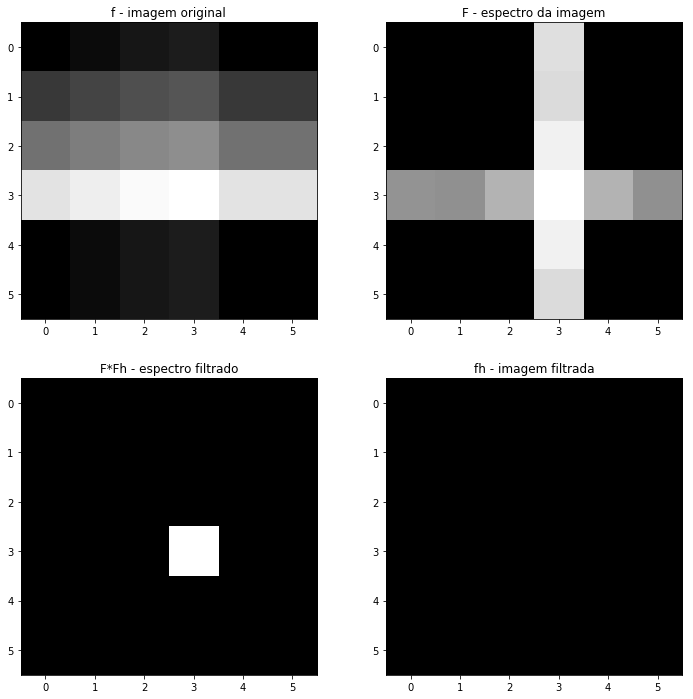

In [4]:
if testing:
    #Caso numérico
    #caso 1 - Apenas a componente de mais baixa frequência deve passar
    np.set_printoptions(precision=0)
    f = np.zeros((6,6))
    f[1,:] = 50  
    f[2,:] = 100  
    f[3,:] = 200  

    f[:,1] += 10  
    f[:,2] += 20   
    f[:,3] += 25 
    #parametros da elipse
    a = 1
    b = 1
    g = fid.filtroidealdemo(f,a,b)

    print("f:\n",f)

    print("g:\n",g.real)

    # calculando valor da componente 
    com = np.rint(np.sum(f)/f.size)

    print("média da imagem:\n",com)


f:
 [[   0.   10.   20.   25.    0.    0.    0.]
 [  50.   60.   70.   75.   50.   50.   50.]
 [ 100.  110.  120.  125.  100.  100.  100.]
 [ 200.  210.  220.  225.  200.  200.  200.]
 [   0.   10.   20.   25.    0.    0.    0.]
 [   0.   10.   20.   25.    0.    0.    0.]
 [   0.   10.   20.   25.    0.    0.    0.]]
g:
 [[   1e-13    1e+01    2e+01    3e+01    2e-13    8e-14    9e-14]
 [   5e+01    6e+01    7e+01    7e+01    5e+01    5e+01    5e+01]
 [   1e+02    1e+02    1e+02    1e+02    1e+02    1e+02    1e+02]
 [   2e+02    2e+02    2e+02    2e+02    2e+02    2e+02    2e+02]
 [   5e-13    1e+01    2e+01    3e+01    6e-13    5e-13    4e-13]
 [  -1e-13    1e+01    2e+01    2e+01   -5e-14   -1e-13   -6e-14]
 [  -6e-14    1e+01    2e+01    2e+01    4e-15   -2e-14   -6e-14]]
f e g são iguais? : True


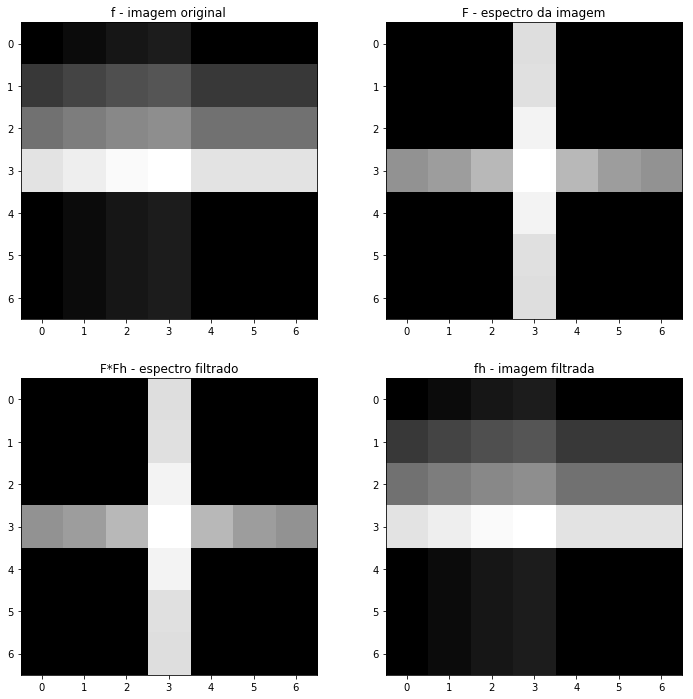

In [5]:
if testing:
    #caso 2 - Todas as frequencias passam
    f = np.zeros((7,7))
    f[1,:] = 50  
    f[2,:] = 100  
    f[3,:] = 200  

    f[:,1] += 10  
    f[:,2] += 20   
    f[:,3] += 25 
    #parametros da elipse
    r,c = f.shape
    a = r//2+1
    b = c//2+1
    g = fid.filtroidealdemo(f,a,b)

    print("f:\n",f)
    print("g:\n",g.real)

    print("f e g são iguais? :",(abs(f-g.real)<10E-4).all() )

H,W:
 (256, 256)


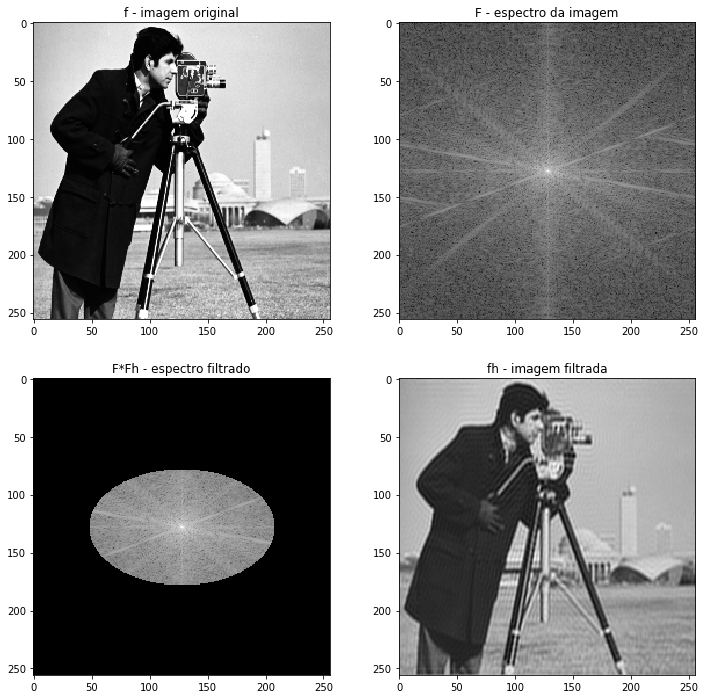

In [6]:
if testing:
    # teste para imagem com dimensão par
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    print("H,W:\n",f.shape)

    #parametros da elipse
    a = 50
    b = 80

    g = fid.filtroidealdemo(f,a,b)

H,W:
 (315, 295)


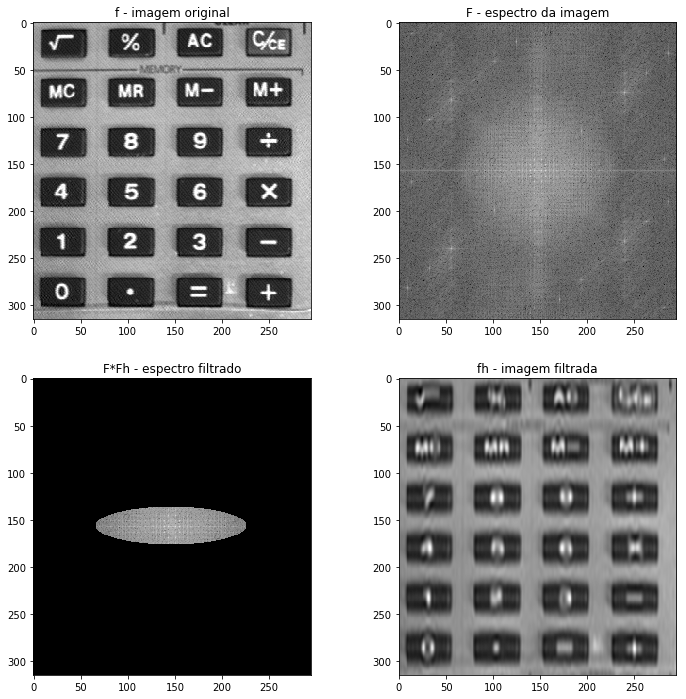

In [7]:
if testing:
    # teste para imagem com dimensão par
    f = mpimg.imread('/home/lotufo/ia898/data/keyb.tif')
    f = f[1:,:]
    print("H,W:\n",f.shape)

    #parametros da elipse
    a = 20
    b = 80

    g = fid.filtroidealdemo(f,a,b)